# Рекомендательный сервис постов для пользователей социальной сети
# A/B тестирование результативности модели

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
import datetime as dt

In [3]:
params = {
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'axes.titlesize': 15,   # Размер шрифта главной подписи          
          'axes.labelsize': 14,    # Размер шрифта подписей осей
          'axes.grid': True,  # сетка по умолчанию
          'axes.edgecolor': 'gray' # цвет осей серый
          }

plt.rcParams.update(params)

### Задание 9
Проверка разбиения групп. <b>
    
Проверьте, нет ли у нас пользователей, которые попали в обе группы. Если их совсем немного, удалите их из обеих выборок (если бы было много, то надо было разбираться, что пошло не так).<b>
    
Теперь, когда мы знаем про однозначное соответствие, сделайте табличку пользователь-группа. Проверьте, что группы получаются одинакового размера по пользователям. Для этого можно посчитать долю каждой группы, а ещё можно применить критерий для долей (биномиальный тест), чтобы проверить соответствие этой доли ожидаемым 0.5.

In [4]:
# загружаем датасеты с лайками и просмотрами пользователей

views = pd.read_csv("data/views_ABtest.csv", sep=',')
likes = pd.read_csv("data/likes_ABtest.csv", sep=',')

In [5]:
views.shape

(193295, 4)

In [19]:
# информация, какому пользователю что мы порекомендовали, в какую группу его отнесли и когда это произошло.

views.head(3)

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825


In [1]:
likes.shape

NameError: name 'likes' is not defined

In [20]:
# информация, какой пользователь и какой пост лайкнул, в том числе момент времени, когда это произошло.

likes.head(3)

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828


In [12]:
# считаем количество рекомендаций и лайков на пользователя

qty_recommendations = views.groupby('user_id')['user_id'].count().sort_values(ascending = False)
qty_recommendations = qty_recommendations.to_list()

qty_likes = likes.groupby('user_id')['user_id'].count().sort_values(ascending = False)
qty_likes = qty_likes.to_list()

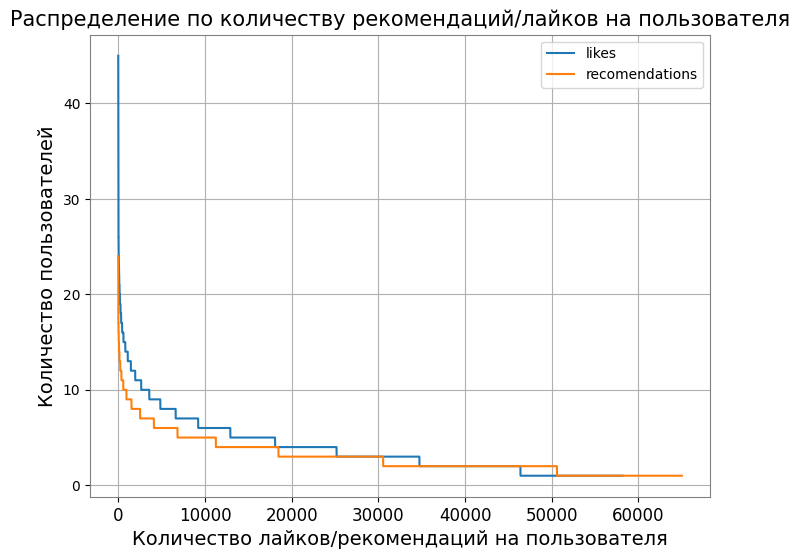

In [14]:
# посмотрим на графике, как распределяется количество рекомендаций и лайков на пользователя

fig = plt.figure(figsize=(8, 6))

plt.plot(qty_likes, label='likes')
plt.plot(qty_recommendations, label='recomendations')


plt.title('Распределение по количеству рекомендаций/лайков на пользователя')
plt.xlabel('Количество лайков/рекомендаций на пользователя')
plt.ylabel('Количество пользователей')
plt.legend()

plt.show()

In [234]:
# проверяем группы на повторяющиеся id в группах контроля и теста. проверка показала, что есть 4 повтора, их удаляем

qty_groups = views.groupby('user_id')['exp_group'].nunique()
to_drop = qty_groups[qty_groups != 1].index.to_list()

# удаляем дублирующихся пользователей
views_nodub = views.drop(views[views['user_id'].isin(to_drop)].index, axis=0)

[25623, 55788, 142283, 148670]

In [17]:
qty_group_test, qty_group_control

NameError: name 'qty_group_test' is not defined

In [438]:
# гипотеза Н0: распределение соответствует вероятности распределения Бернулли 0.5,
# биномиальный тест,
# значечние p-value = 0.2306,
# вывод: H0 не отвергаем

qty_group_test = views_nodub[views_nodub['exp_group'] == 'test'].shape[0]
qty_group_control = views_nodub[views_nodub['exp_group'] == 'control'].shape[0]

binom_results = scipy.stats.binom_test(qty_group_test, views_nodub.shape[0], p=0.5)
binom_results

0.23062291448605168

### Задание 10
Теперь давайте попробуем оценить, а улучшаются ли наши метрики в тестовой группе.<b>

Наши данные о показах и кликах хранятся в разных табличках и просто так их не получается сджойнить. Давайте оставим это на потом, а пока попробуем оценить более простыми метриками. Подумайте, какие метрики можно было бы посчитать без джойна показов и кликов.<b>

Соберите табличку, в которой будут пользователи, попавшие в наш эксперимент (то есть те, для которых мы строили хотя бы одну рекомендацию). Посчитайте, кто из них сколько лайков сделал. Наверняка будут пользователи, которые не сделали ни один лайк.<b>

Посчитайте долю пользователей, которая сделала хотя бы один лайк за время эксперимента без разбивки на группы.

In [1125]:
views_nodub.head(3)

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825


In [254]:
likes.head(3)

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828


In [299]:
# количество лайков на пользователя

likes_per_user = pd.DataFrame(likes.groupby('user_id')['user_id'].count().sort_values(ascending=False))\
                                    .rename(columns={'user_id': 'qty_likes'})
likes_per_user.head(3)

,qty_likes
user_id,
80137,45
86170,44
62950,44


In [355]:
# таблица с группами эксперимента

user_exp_groups = pd.DataFrame(views_nodub.groupby('user_id')['exp_group'].first())
user_exp_groups.head(3)

,exp_group
user_id,
200,test
201,test
202,test


In [364]:
# мерджим с лайками

likes_views_df = user_exp_groups.merge(likes_per_user, how='left', on='user_id')
likes_views_df = pd.DataFrame(likes_views_df).fillna(0)
likes_views_df.head(3)

,exp_group,qty_likes
user_id,,
200,test,1.0
201,test,3.0
202,test,2.0


In [365]:
# процент людей с лайками

percent_likes = pd.DataFrame(likes_views_df.groupby('qty_likes')['qty_likes'].count()).rename(columns={'qty_likes' : 'qty_users'})
total_likes = percent_likes['qty_users'].sum()
percent_likes['%_likes'] =  np.round(percent_likes['qty_users'] / total_likes * 100, 2) 

print(f"Доля пользователей, поставивших лайк: ", 100 - percent_likes.loc[0, ['%_likes']].values)
percent_likes.head(3)

Доля пользователей, поставивших лайк:  [89.48]


,qty_users,%_likes
qty_likes,,
0.0,6842,10.52
1.0,11783,18.13
2.0,11654,17.93


### Задание 11

Оцените, различаются ли число лайков между группами. Выберите подходящий статистический критерий и проверьте две метрики: доля пользователей с хотя бы одним лайком, число лайков на пользователя. <b>

Какой статистические критерий наиболее хорошо подходит для метрики "число лайков на пользователя"?<b>

In [435]:
len(test_group_ids), len(control_group_ids)

(32659, 32350)

In [410]:
# датасеты с количеством лайков в тестовой и контрольной группе

test_group_ids = views_nodub[views_nodub['exp_group'] == 'test']['user_id'].unique()
control_group_ids = views_nodub[views_nodub['exp_group'] == 'control']['user_id'].unique()

percent_likes_test = pd.DataFrame(likes_views_df.loc[test_group_ids].groupby('qty_likes')['qty_likes'].count())\
                                                    .rename(columns={'qty_likes' : 'qty_users'}).reset_index()

percent_likes_control = pd.DataFrame(likes_views_df.loc[control_group_ids].groupby('qty_likes')['qty_likes'].count())\
                                                    .rename(columns={'qty_likes' : 'qty_users'}).reset_index()

percent_likes_test.head(3)

,qty_likes,qty_users
0,0.0,3326
1,1.0,5820
2,2.0,5857


In [530]:
# метрика-1
# доля пользователей с хотя бы одним лайком

likes_views_df['like_or_not'] = (likes_views_df['qty_likes'] != 0).map({True: 1, 0: 0})

test_min_one_like = likes_views_df[likes_views_df['exp_group'] == 'test']['like_or_not']
control_min_one_like = likes_views_df[likes_views_df['exp_group'] == 'ontrol']['like_or_not']

test_min_one_like.head(3)

user_id
200    1
201    1
202    1
Name: like_or_not, dtype: int64

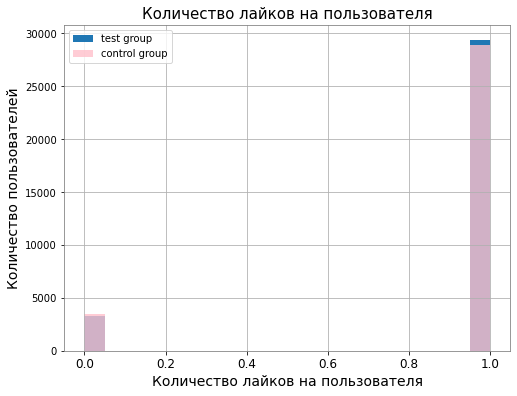

In [531]:
# гистограмма распределения лайков

fig = plt.figure(figsize=(8, 6))

plt.hist(test_min_one_like, bins=20, label='test group')
plt.hist(control_min_one_like, color='pink', alpha=0.8, bins=20, label='control group')

plt.title('Количество лайков на пользователя')
plt.xlabel('Количество лайков на пользователя')
plt.ylabel('Количество пользователей')
plt.legend()

plt.show()

In [533]:
# гипотеза Н0: доля лайков в группах значимо не различается
# тест: Манна-Уитни-Уилкоксона
# значения: p-value=0.00222
# вывод: отвеграем Н0 об отсутствии различия в доле лайков между группами, принимаем Н1

scipy.stats.mannwhitneyu(test_min_one_like, control_min_one_like, alternative='greater')

MannwhitneyuResult(statistic=531875797.0, pvalue=0.0022275340117559063)

In [503]:
# метрика-2
# число лайков на пользователя

test_group_likes = likes_views_df[likes_views_df['exp_group'] == 'test']['qty_likes']
control_group_likes = likes_views_df[likes_views_df['exp_group'] == 'control']['qty_likes']
control_group_likes.head(3)

user_id
217    4.0
221    5.0
229    3.0
Name: qty_likes, dtype: float64

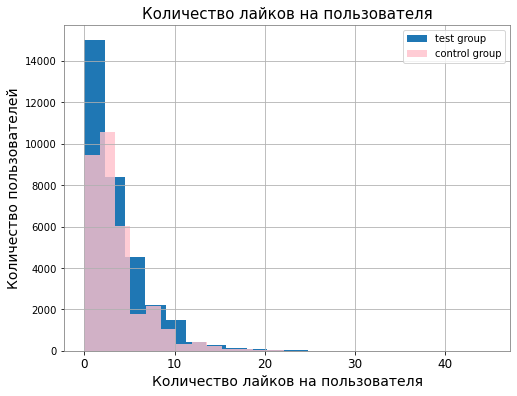

In [504]:
# гистограмма распределения лайков

fig = plt.figure(figsize=(8, 6))

plt.hist(test_group_likes, bins=20, label='test group')
plt.hist(control_group_likes, color='pink', alpha=0.8, bins=20, label='control group')

plt.title('Количество лайков на пользователя')
plt.xlabel('Количество лайков на пользователя')
plt.ylabel('Количество пользователей')
plt.legend()

plt.show()

In [536]:
# гипотеза H0: распределение числа лайков на пользователя не различается в группах
# тест: Манна-Уитни-Уилкоксона
# значения: p-value = 1.479-05
# вывод: отвераем Н0, что выборки не различаются, принимаем H1

mann_test = scipy.stats.mannwhitneyu(test_group_likes, control_group_likes, alternative='greater')
mann_test

MannwhitneyuResult(statistic=518358073.0, pvalue=0.9999852074960237)

In [1017]:
views.head(3)

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825


In [1216]:
likes.head(3)

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828


### Задание 13

Посчитать hitrate для test и control <b>

Сделать join по пользователям всех лайков и всех показов рекомендаций (то есть у нас появятся пары всех показов и всех лайков одного и того же пользователя, но не все эти пары реальны). Далее отфильтровать те ситуации, где лайк предшествовал показу рекомендаций (то есть относился на самом деле к другому показу) или был слишком поздно (тоже относится к другому показу).

In [1223]:
likes1 = likes.copy()
views1 = views_nodub.copy()

In [1224]:
# мерджим лайки и рекоммендации

df = views1.merge(likes, how='left', on='user_id').rename(columns={'timestamp_x': 'time_view', 'timestamp_y': 'time_like'})\
                                                    .sort_values(by=['user_id', 'time_view'], ascending=False)

In [1225]:
df.shape

(1016889, 6)

In [1226]:
# делим рекоммендации на несколько столбцов

posts = df['recommendations'].str.replace('[', '').str.replace(']', '').str.split(expand=True)
df = df.join(posts)

df.drop('recommendations', axis=1, inplace=True)

In [1233]:
# заменяем nan на 0 (не дропаем, т.к. показ был, но не было лайка)

df[['post_id', 'time_like']] = df[['post_id', 'time_like']].fillna(0)

In [1235]:
# приводим к типу int

df[['time_like', 'time_view', 'post_id', 0, 1, 2, 3, 4]] = df[['time_like', 'time_view', 'post_id', 0, 1, 2, 3, 4]].astype('int64')

In [1236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016889 entries, 720646 to 824029
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1016889 non-null  int64 
 1   exp_group  1016889 non-null  object
 2   time_view  1016889 non-null  int64 
 3   post_id    1016889 non-null  int64 
 4   time_like  1016889 non-null  int64 
 5   0          1016889 non-null  int64 
 6   1          1016889 non-null  int64 
 7   2          1016889 non-null  int64 
 8   3          1016889 non-null  int64 
 9   4          1016889 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 117.6+ MB


In [1237]:
# заполняем единицами 
# - номер рекомендации == номер поста, 
# - лайк был не позже, чем через 60 мин от рекомендации,

df['goal'] = None
df.loc[((df['post_id'] == df[0])|
      (df['post_id'] == df[1])|
      (df['post_id'] == df[2])|
      (df['post_id'] == df[3])|
      (df['post_id'] == df[4]))&
       (df['time_like'] - df['time_view'] <= 3600), 'goal'] = 1

# остальные значения заполняем нулями
df['goal'] = df['goal'].fillna(0)

In [1281]:
# т.к. timeview не уникально, группируемся по ['user_id', 0, 1, 2, 3, 4]

good_recommends = df.groupby(['user_id', 0, 1, 2, 3, 4], as_index=False).max()
# good_recommends_test = df[df['exp_group'] == 'test'].groupby(['user_id', 0, 1, 2, 3, 4], as_index=False).max()
# good_recommends_control = df[df['exp_group'] == 'control'].groupby(['user_id', 0, 1, 2, 3, 4], as_index=False).max()

In [1288]:
# отношение к общему числу рекомендаций (правильный ответ 71%)

hitrate = good_recommends['goal'].sum() / len(good_recommends)
hitrate_test = good_recommends_test['goal'].sum() / len(good_recommends_test)
hitrate_control = good_recommends_control['goal'].sum() / len(good_recommends_control)

print(f' Hitrate \n общий: {hitrate},\n тестовая группа: {hitrate_test}, \n контрольная группа: {hitrate_control}')

 Hitrate 
 общий: 0.7138791729618975,
 тестовая группа: 0.7204379863361473, 
 контрольная группа: 0.707284424613469


Более подробная инструкция

1. Объединяем два датафрейма - с показами и кликами. Нужно подобрать такой джойн, чтобы остались и показы без кликов.
2. Разбиваем значения в списке рекомендаций на отдельные - могут помочь [.str.split()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html), [str.replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) и [.explode()](https://pandas.pydata.org/docs/reference/api/pandas.Series.explode.html#pandas.Series.explode)
3. Помечаем все **ненужные** нам посты. Это те, у которых **нет id** (стоит пропуск в `post_id`), которые **лайкнули позже, чем через час**, в которых **просмотр оказался позже лайка**, а также те, которые **не рекомендовали**
4. Самое сложное: для каждого юзера/поста/просмотра подбираем количество лайков, связанное именно с этой комбинацией. То есть лайкнул человек этот пост после показа или нет, 1 или 0, True или False. При этом учитывайте условия из прошлого шага - все эти варианты считаются за 0/False. Вот это и будет наш **hitrate**
5. Остаётся лишь посчитать относительную частоту лайкания

In [1012]:
# второй способ = через explode

# def convert_tolist(str):
#     lst=[]
#     try:
#         lst = [int(i) for i in str[1: -1].strip().replace('   ', ' ').replace('  ', ' ').split(' ')]

#     except:
#         print(str)
        
#     return lst

# df['recommendations'] = df['recommendations'].apply(convert_tolist)

In [1041]:
# второй способ = через explode

# эксплодим датафейм по всем постам

# df = df.explode('recommendations')

In [1043]:
# второй способ = через explode

# ставим нелайкнутым постам 0, а лайкнутым 1:
#  нелайкнутые - это:
# - номер рекомендации != номер поста, 
# - лайк был раньше рекоммендации или был позже чем на 60 мин,
# - пост не рекоммендовали

# df['goal'] = None
# df.loc[((df['recommendations'] == df['post_id']) & (df['time_like'] - df['time_view'] > 60)) 
#                                                 | (df['recommendations'] != df['post_id']), 'goal'] = 0
# df['goal'] = df['goal'].fillna(1)

In [1047]:
# второй способ = через explode
# считаем hitrate

# # количество лайков на каждую рекомендацию
# good_recommends_implode = df.groupby('index')['time_like', 'goal'].max()
# good_recommends = good_recommends_implode.groupby('time_like', as_index=False).max()


# # отношение к общему числу рекомендаций (правильный ответ 71%, тут получается 70%)

# hitrate = good_recommends['goal'].sum() / len(views1)
# hitrate 

### Задание 14

Оценим различие между группами и значимость. <b>

z-критерий для долей мы здесь не можем применять, так как у нас в каждой выборке один и тот же пользователь может встречаться несколько раз. Давайте применим бакетный подход (то есть перейдём к бакетам и по ним оценим значимость), чтобы посчитать групповой hitrate (или CTR) — доля hitrate по группе/бакету. Используйте 100 бакетов. Уровень значимости останется тем же на уровне 0.05.

In [1253]:
#  функция для расчета хэша

import hashlib
SALT_b = 'my_salt'

def bucket_no(id):
    no = int(hashlib.md5((str(id) + SALT_b).encode()).hexdigest(), 16) % 100
             
    return no

In [1254]:
# назначаем номера бакетов

df['bucket'] = df['user_id'].apply(bucket_no)

In [1268]:
# делим группы на тест и контрол

df_test = df[df['exp_group'] == 'test']
df_control = df[df['exp_group'] == 'control']

In [1290]:
# считаем hitrates для групп

def count_hitrates(data):
    bucket_hitrates = []
    
    for b in data.bucket.unique():
        temp = data[data['bucket'] == b].groupby(['user_id', 0, 1, 2, 3, 4], as_index=False).max()
        hitrate = temp['goal'].sum() / len(temp)
        bucket_hitrates.append(hitrate)
        
    return bucket_hitrates


control_bucket_hitrates, test_bucket_hitrates = count_hitrates(df_control), count_hitrates(df_test)
    


In [1294]:
# гипотеза Н0: hitrate в контрльной группе такой же как в тестовой
# тест: Манна-Уитни
# результат: значечние p-value = 1.8334862056974616e-08
# вывод: принимаем H1: hitrate в контрльной группе больше, чем в тестовой


test_mann_hitrate = scipy.stats.mannwhitneyu(test_bucket_hitrates, control_bucket_hitrates, alternative='greater')
test_mann_hitrate

MannwhitneyuResult(statistic=7254.0, pvalue=1.8334862056974616e-08)